# Shifting Spectra

In [2]:
#Importing the necessary packages
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
Lambda = splot.apStarWavegrid()
import csv

## Unshifted Plot

(450, 1200)

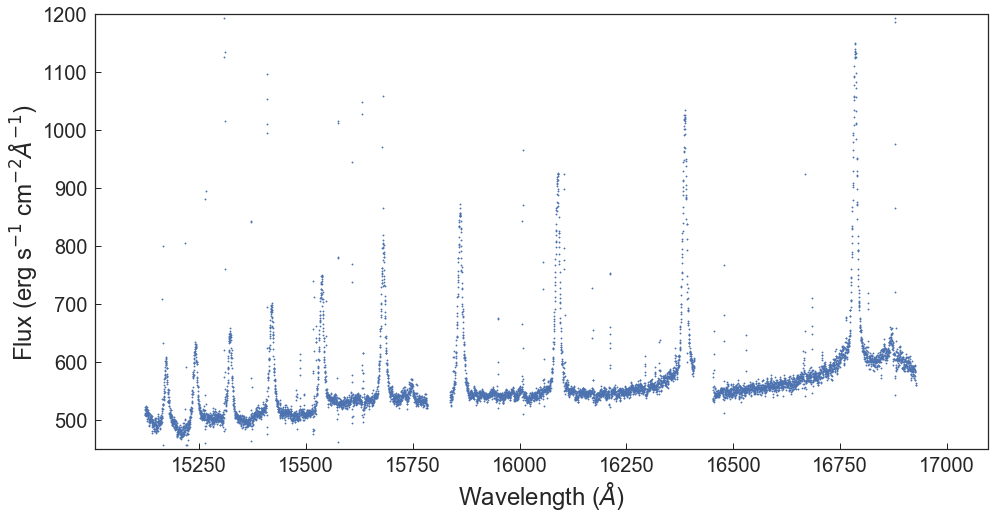

In [14]:
loc_id = 4586
two_massid='2M03434449+3143092'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)[3]
fig,ax = plt.subplots(figsize=(16,8))
plt.scatter(Lambda,spectest1,s=2)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
plt.ylim(450,1200)

Above is the unshifted plot of the APOGEE data in scatter form

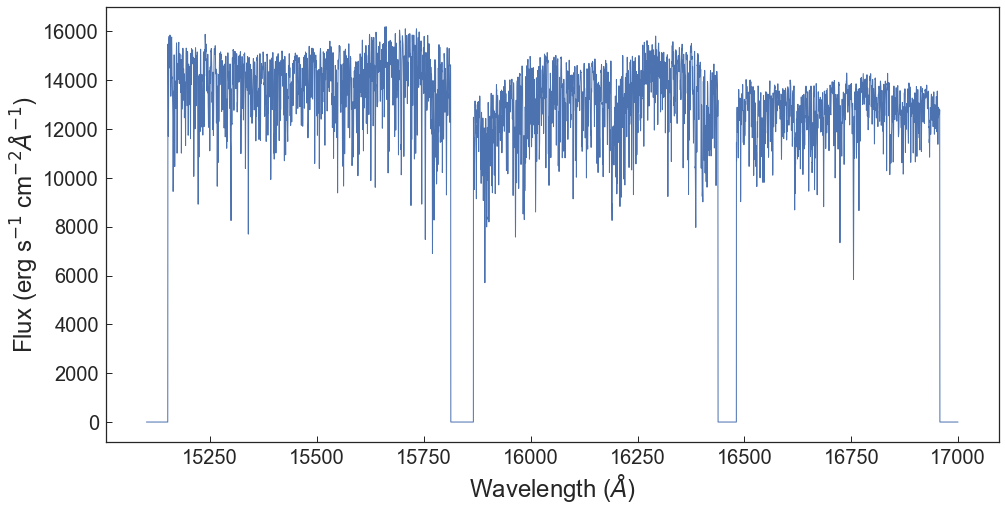

In [35]:
loc_id = 4587
two_massid='2M03243037+3043128'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(Lambda,spectest1,linewidth=1)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
#plt.ylim(-50,300)

(16750, 16850)

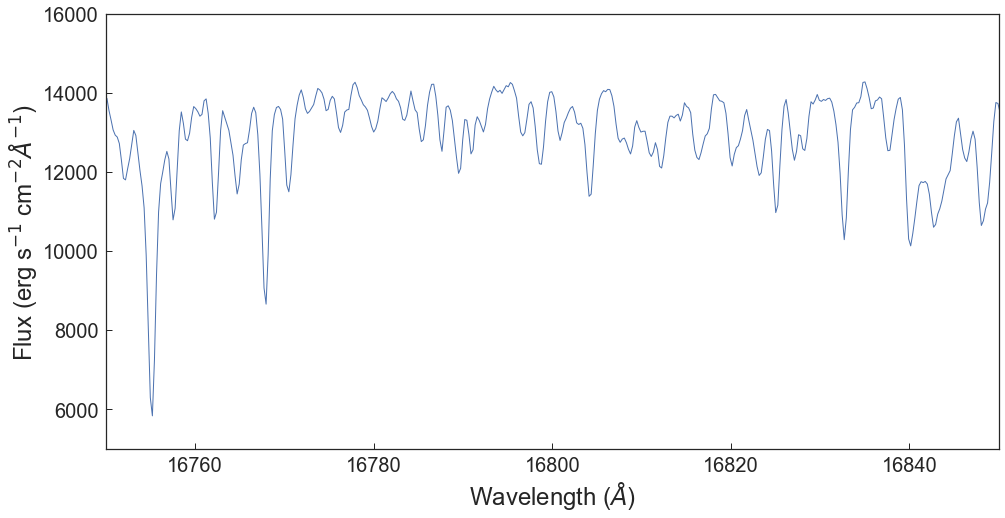

In [39]:
loc_id = 4587
two_massid='2M03243037+3043128'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(Lambda,spectest1,linewidth=1)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
plt.ylim(5000,16000)
plt.xlim(16750,16850)

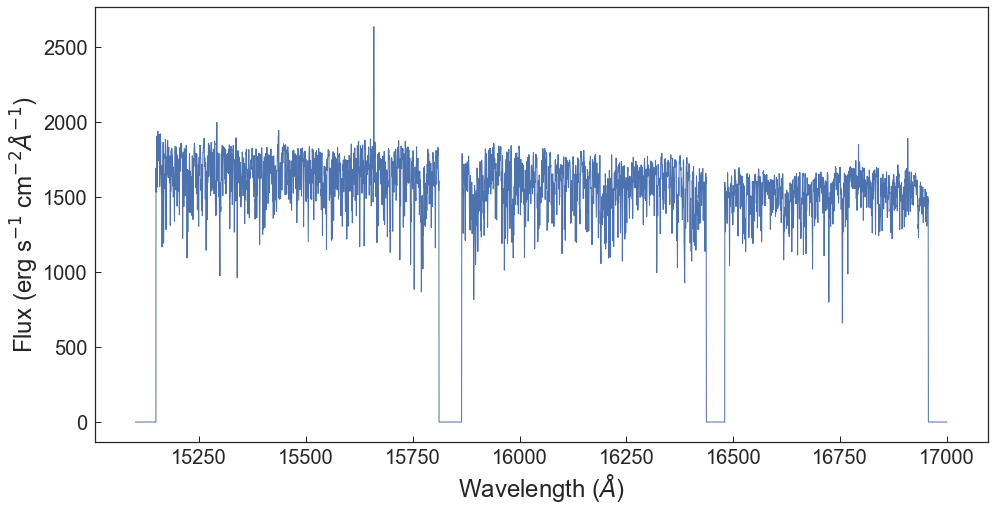

In [32]:
loc_id = 4587
two_massid='2M03274204+3026189'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)[3]
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(Lambda,spectest1,linewidth=1)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
#plt.ylim(-50,300)

(16750, 16850)

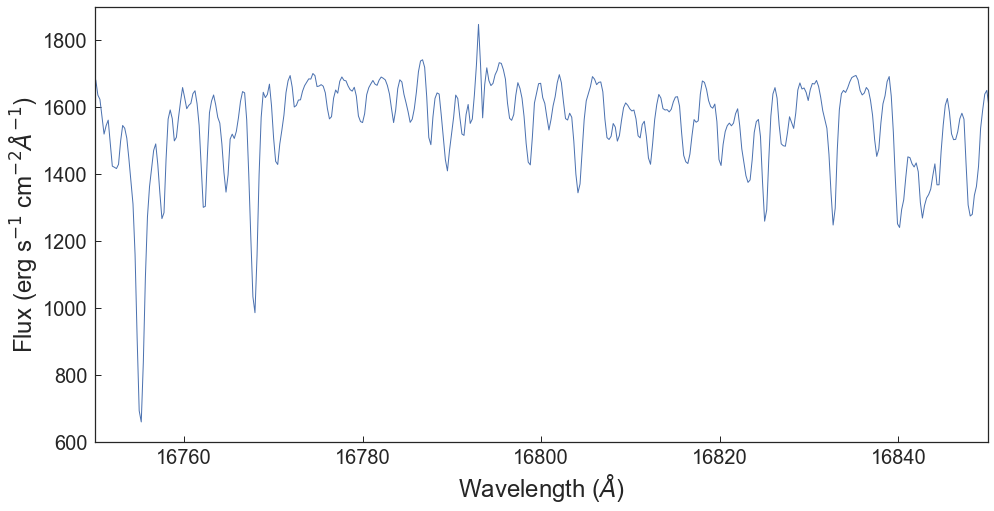

In [41]:
loc_id = 4587
two_massid='2M03274204+3026189'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)[3]
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(Lambda,spectest1,linewidth=1)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
plt.ylim(600,1900)
plt.xlim(16750,16850)

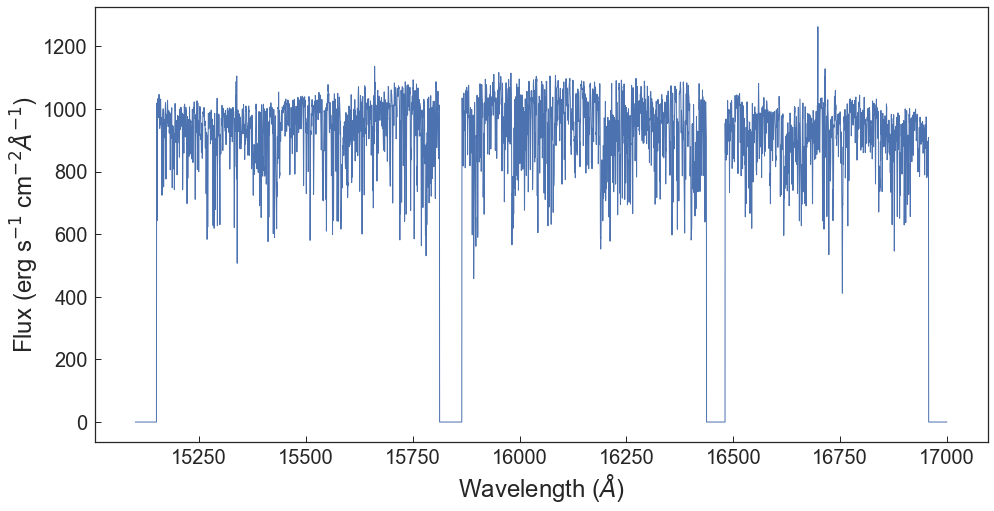

In [31]:
loc_id = 4285
two_massid='2M18513571+3021504'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)[3]
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(Lambda,spectest1,linewidth=1)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
#plt.ylim(-50,300)

(16750, 16850)

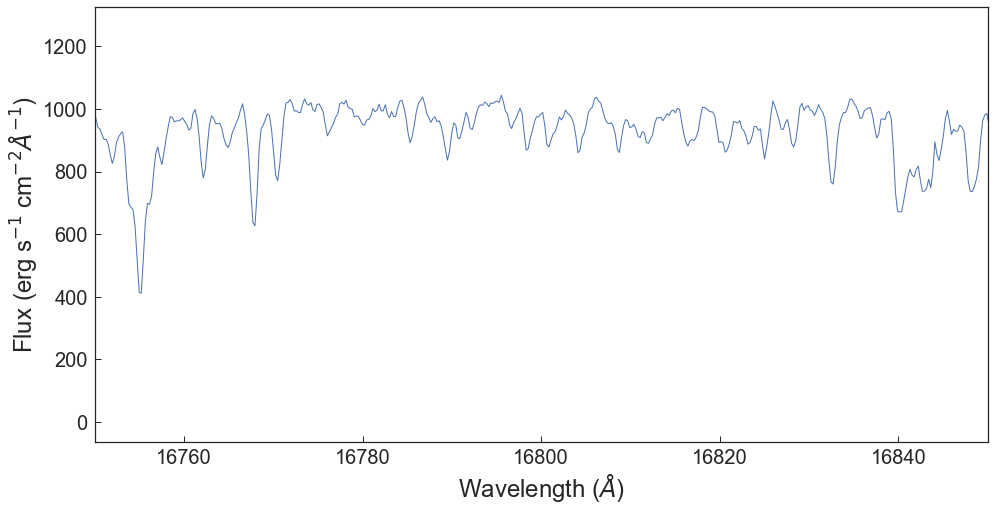

In [29]:
loc_id = 4285
two_massid='2M18513571+3021504'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)[3]
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(Lambda,spectest1,linewidth=1)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
plt.xlim(16750,16850)
#plt.ylim(-50,300)

In [30]:
spectest2 = apread.apStar(4285,'2M18513571+3021504',ext=0,header=True)
spectest2

(None, 
 SIMPLE  =                    T /image conforms to FITS standard
 BITPIX  =                   16 /bits per data value
 NAXIS   =                    0 /number of axes
 EXTEND  =                    T /file may contain extensions
 DATE    = '2016-01-26'         / Creation UTC (CCCC-MM-DD) date of FITS header
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H
 OBJID   = '2M18513571+3021504' / Object ID
 J       =              11.0500 / 2MASS J magnitude
 H       =              10.1810 / 2MASS H magnitude
 K       =              9.90600 / 2MASS Ks magnitude
 TARG1   =          -2147481584 / First APOGEE targeting flag (bitwise, see docs)
 TARG2   =                    0 / Second APOGEE targeting flag (bitwise, see docs
 TARG3   =                    0 / Third APOGEE targeting flag (bitwise, see docs)
 SURVEY  = 'apogee  '           / Survey name (for targeting flags)
 TELESCOP= '